<a href="https://colab.research.google.com/github/lvysher/cnn-image-classification/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = "/content/drive/My Drive/image classification/data"
train_dir = f"{data_dir}/train"
test_dir = f"{data_dir}/test"

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [ ]:
import tensorflow as tf

img_height, img_width = 150, 150
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)
class_names = train_ds.class_names
print("Class 0 is:", class_names[0])
print("Class 1 is:", class_names[1])


Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.
Class 0 is: cats
Class 1 is: dogs


In [ ]:
import numpy as np

X_train = []
Y_train = []

for images, labels in train_ds:
    X_train.append(images.numpy())
    Y_train.append(labels.numpy())

X_train = np.concatenate(X_train)
Y_train = np.concatenate(Y_train)

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)

Shape of X_train: (557, 150, 150, 3)
Shape of Y_train: (557, 1)


In [17]:
X_test = []
Y_test = []

for images, labels in test_ds:
    X_test.append(images.numpy())
    Y_test.append(labels.numpy())

X_test = np.concatenate(X_test)
Y_test = np.concatenate(Y_test)

print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_test: (140, 150, 150, 3)
Shape of Y_test: (140, 1)


In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

MODEL

In [19]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train, epochs = 15, batch_size = 64)

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9514 - loss: 0.1917
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9507 - loss: 0.1425
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9453 - loss: 0.1487
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9543 - loss: 0.1178
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9860 - loss: 0.0564
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9776 - loss: 0.0655
Epoch 7/15
7/9 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9653 - loss: 0.0873

In [22]:
model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 0.5087 - loss: 0.6921


[0.6920923590660095, 0.5142857432365417]

In [23]:
idx = random.randint(0, len(X_test) - 1)
img = X_test[idx]

print("Image shape:", img.shape)
print("Data type:", img.dtype)
print("Pixel range:", np.min(img), "to", np.max(img))

Image shape: (150, 150, 3)
Data type: float32
Pixel range: 0.0 to 1.0


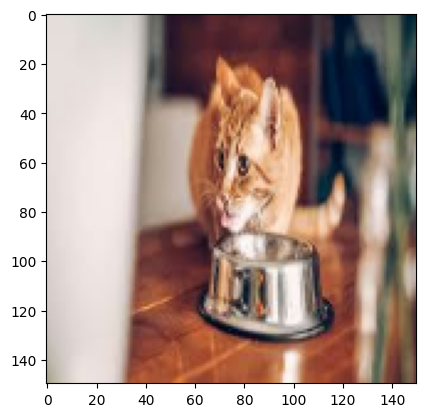

In [24]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

PREDICTING

In [41]:
loss, acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {acc:.2%}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.7502 - loss: 0.9295
Test Accuracy: 71.43%


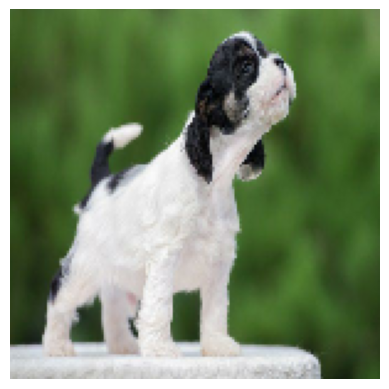

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Our model says it is a: dog


In [53]:
idx2 = random.randint(0, len(Y_test) - 1)

img = X_test[idx2]


plt.imshow(img)
plt.axis('off')
plt.show()


y_pred = model.predict(img.reshape(1, 150, 150, 3))
y_pred_label = int(y_pred[0][0] > 0.5)


pred = 'cat' if y_pred_label == 0 else 'dog'
print("Our model says it is a:", pred)